### New York Airport Weather Analysis with Pandas
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT731

---

### 1. Introduction
In this report, 2013 weather data from three airports in New York (LGA, JFK, EWR) were selected with the main purpose of exploring the usage of python pandas. Firstly, daily wind speeds were analyzed for LGA, followed by a comparison of monthly wind speeds at the three airports. Finally, for the missing temperature data at the JFK airport, the linear interpolating was applied to fill in the gaps and compare the data with the original data.

### 2. Daily Windspeed Analysis on LGA Airport
We are going to find the daily mean wind speeds at LGA airport, and the ten windiest days.  

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [152]:
df = pd.read_csv("https://github.com/Maxmelon326/SIT731/raw/main/weather.csv", comment='#')
print(df.shape)
df.head()

(26130, 15)


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


The columns are: 

• origin – weather station: LGA, JFK, or EWR, 

• year, month, day, hour – time of recording, 

• temp, dewp – temperature and dew point in degrees Fahrenheit, 

• humid – relative humidity, 

• wind_dir, wind_speed, wind_gust – wind direction (in degrees), speed and gust speed (in mph), 

• precip – precipitation in inches, 

• pressure – sea level pressure in millibars, 

• visib – visibility in miles, 

• time_hour – date and hour (based on the year, month, day, hour fields) formatted as YYYY-mmdd
HH:MM:SS (actually, YYYY-mm-dd HH:00:00). However, due to a bug in the dataset, the data in this
column are (incorrectly!) shifted by 1 hour. Do not rely on it unless  manually correct it.

In [153]:
# Convert data 
# Convert temperature (temp and dewp) to Celsius
df['temp'] = (df['temp'] - 32) * 5/9
df['dewp'] = (df['dewp'] - 32) * 5/9

# Convert precipitation (precip) to millimeters
df['precip'] *= 25.4

# Convert visibility (visib) to meters
df['visib'] *= 1609.34

# Convert wind speed (wind_speed and wind_gust) to meters per second
df['wind_speed'] *= 0.44704
df['wind_gust'] *= 0.44704

# Convert 'time_hour' to datetime format
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['time_hour'] = df['time_hour'] - pd.Timedelta('1 hour')# Adjust time

# Display the updated DataFrame
df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.630002,5.328114,0.0,1013.9,16093.4,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.173336,7.104152,0.0,1013.0,16093.4,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658892,6.512139,0.0,1012.6,16093.4,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.173336,7.104152,0.0,1012.7,16093.4,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687781,7.696165,0.0,1012.8,16093.4,2013-01-01 04:00:00


We know there is one obvious outlier among the observed wind speeds. We need to find it and replace it as NaN to compute the means more accurately.  
We are not sure whether the outlier is too big or too small, therefore we can draw graph to find it easier. 

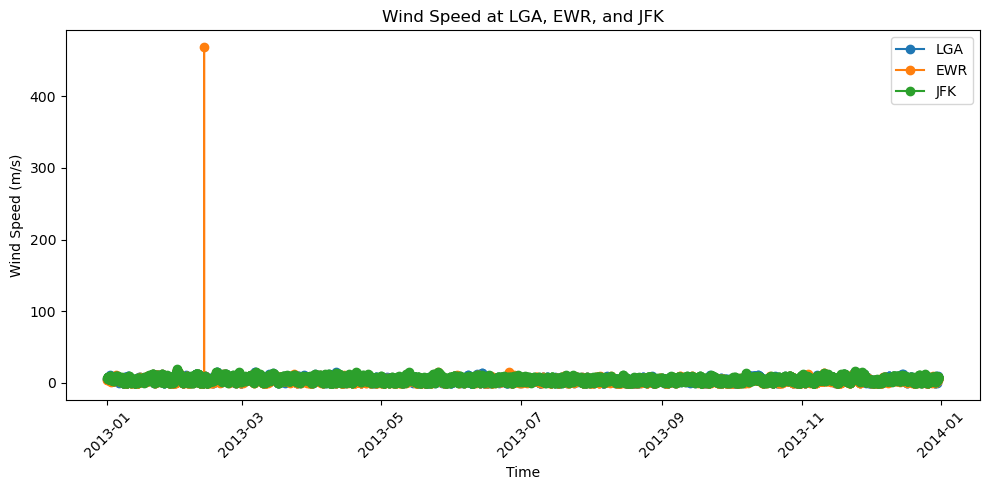

In [154]:
# Get data of LGA、EWR  JFK
lga_data = df[df['origin'] == 'LGA']
ewr_data = df[df['origin'] == 'EWR']
jfk_data = df[df['origin'] == 'JFK']

# Draw line graph
plt.figure(figsize=(10, 5))
plt.plot(lga_data['time_hour'], lga_data['wind_speed'], label='LGA', marker='o')
plt.plot(ewr_data['time_hour'], ewr_data['wind_speed'], label='EWR', marker='o')
plt.plot(jfk_data['time_hour'], jfk_data['wind_speed'], label='JFK', marker='o')

# Set table and title
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed at LGA, EWR, and JFK')
plt.legend()

# Set x scale
plt.xticks(rotation=45)

# Display 
plt.tight_layout()
plt.show()


In [155]:
# From the above the graph, we can know the outlier is too big. 
# Find the outlier day and replace it with np.nan (NaN).
outlier_index = df['wind_speed'].idxmax()

# Display information of the outlier()
outlier_data = df.loc[outlier_index]
outlier_data

origin                        EWR
year                         2013
month                           2
day                            12
hour                            8
temp                          3.9
dewp                         -2.8
humid                       61.63
wind_dir                    260.0
wind_speed             468.659114
wind_gust              539.323535
precip                        0.0
pressure                   1008.3
visib                     16093.4
time_hour     2013-02-12 08:00:00
Name: 1015, dtype: object

In [156]:
# Replace the outlier with NaN
df.at[outlier_index, 'wind_speed'] = np.nan

# Display the updated DataFrame
df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,-5.6,53.97,230.0,4.630002,5.328114,0.0,1013.9,16093.4,2013-01-01 00:00:00
1,EWR,2013,1,1,1,2.8,-5.6,53.97,230.0,6.173336,7.104152,0.0,1013.0,16093.4,2013-01-01 01:00:00
2,EWR,2013,1,1,2,3.3,-5.6,52.09,230.0,5.658892,6.512139,0.0,1012.6,16093.4,2013-01-01 02:00:00
3,EWR,2013,1,1,3,3.3,-5.0,54.51,230.0,6.173336,7.104152,0.0,1012.7,16093.4,2013-01-01 03:00:00
4,EWR,2013,1,1,4,3.3,-4.4,57.04,240.0,6.687781,7.696165,0.0,1012.8,16093.4,2013-01-01 04:00:00


In [157]:
# Filter method
LGA = df.loc[df['origin'] == 'LGA']

# Group by year, month, and day, taking daily mean wind speeds at LGA.
LGA_d_means = LGA.groupby(['year', 'month', 'day'])['wind_speed'].mean()  

# Reset index to get the result as a DataFrame
LGA_d_means = LGA_d_means.reset_index()

# Combine 'year', 'month', and 'day' columns into a single 'date' column
LGA_d_means['date'] = pd.to_datetime(LGA_d_means[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

# Drop the individual 'year', 'month', and 'day' columns
LGA_d_means = LGA_d_means.drop(['year', 'month', 'day'], axis=1)

# Reorder columns
LGA_d_means = LGA_d_means[['date', 'wind_speed']]

# Display the updated DataFrame
print(LGA_d_means)

          date  wind_speed
0   2013-01-01    6.687781
1   2013-01-02    6.430559
2   2013-01-03    4.908660
3   2013-01-04    6.880698
4   2013-01-05    5.144447
..         ...         ...
359 2013-12-26    3.301020
360 2013-12-27    5.401669
361 2013-12-28    4.672873
362 2013-12-29    3.794030
363 2013-12-30    6.001855

[364 rows x 2 columns]


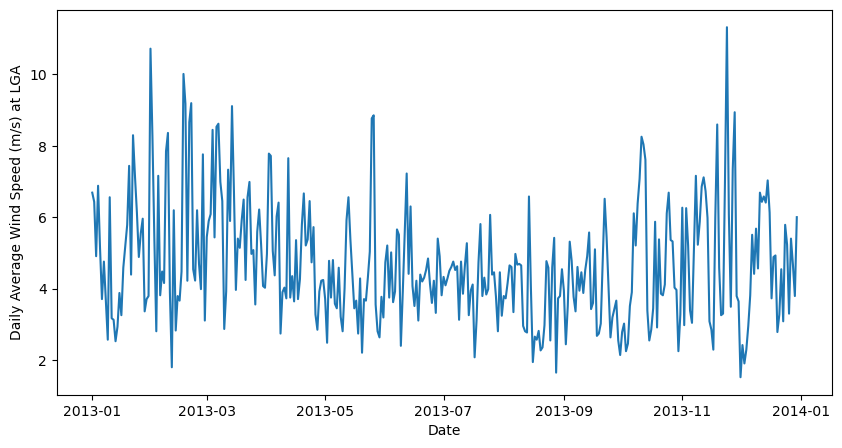

In [158]:
# Plotting the daily mean wind speeds at LGA
plt.figure(figsize=(10, 5))
plt.plot(LGA_d_means['date'], LGA_d_means['wind_speed'])
plt.xlabel('Date')
plt.ylabel('Daily Average Wind Speed (m/s) at LGA')
plt.show()

We can see that the wind speed fluctuates the most in February and December, with the maximum wind speed in December, and also fluctuates considerably in June and October, and is relatively small in the summer months.

In [159]:
# Sort by daily mean wind speed in descending order
windiest_days_LGA = LGA_d_means.sort_values(by='wind_speed', ascending=False)

# Select the top ten windiest days
top_ten_windiest_days_LGA = windiest_days_LGA.head(10).round(2)
top_ten_windiest_days_LGA.index = range(1, 11)

# Display the result
print(top_ten_windiest_days_LGA[['date', 'wind_speed']])


         date  wind_speed
1  2013-11-24       11.32
2  2013-01-31       10.72
3  2013-02-17       10.01
4  2013-02-21        9.19
5  2013-02-18        9.17
6  2013-03-14        9.11
7  2013-11-28        8.94
8  2013-05-26        8.85
9  2013-05-25        8.77
10 2013-02-20        8.66


Specific to date, we can see maximum wind speeds in late November, late January and mid-February.

### 3. Monthly Windspeed Analysis on Three Airports

We will compare the average monthly wind speeds at the three airports.

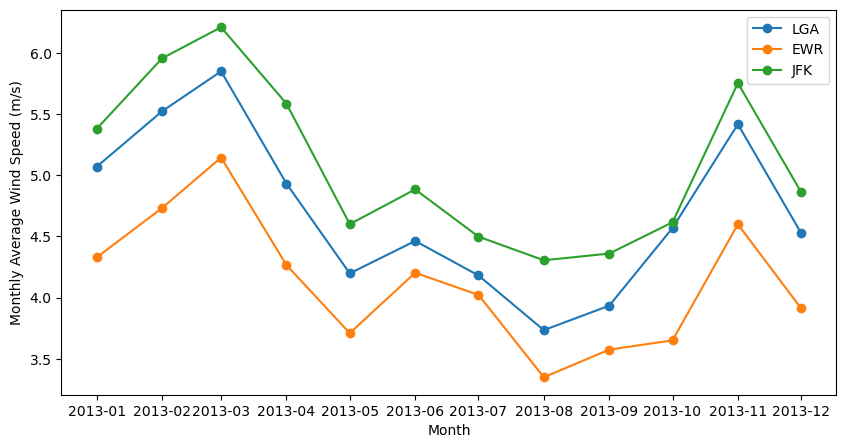

In [160]:
# Filter data for each airport
LGA = df[df['origin'] == 'LGA']
EWR = df[df['origin'] == 'EWR']
JFK = df[df['origin'] == 'JFK']

# Group by year & month taking monthly mean wind speeds for each airport
LGA_monthly_means = LGA.groupby(['year', 'month'])['wind_speed'].mean().reset_index()
EWR_monthly_means = EWR.groupby(['year', 'month'])['wind_speed'].mean().reset_index()
JFK_monthly_means = JFK.groupby(['year', 'month'])['wind_speed'].mean().reset_index()


# Change time format
LGA_monthly_means['date'] = pd.to_datetime(LGA_monthly_means[['year', 'month']].assign(day=1))
EWR_monthly_means['date'] = pd.to_datetime(EWR_monthly_means[['year', 'month']].assign(day=1))
JFK_monthly_means['date'] = pd.to_datetime(JFK_monthly_means[['year', 'month']].assign(day=1))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(LGA_monthly_means['date'], LGA_monthly_means['wind_speed'], label='LGA', marker='o')
plt.plot(EWR_monthly_means['date'], EWR_monthly_means['wind_speed'], label='EWR', marker='o')
plt.plot(JFK_monthly_means['date'], JFK_monthly_means['wind_speed'], label='JFK', marker='o')

# Set x-axis format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Monthly Average Wind Speed (m/s)')
plt.legend()
plt.show()


We can see by the chart above, all three airports are in New York, and the monthly variation in wind speeds is essentially the same. It is highest in March, followed by November and lowest in August.

### 4. Handling the Missing Data on JFK airport
There are some missing temperature data at JFK airport, we need to find them and add them by Linear Interpolating and measuring the average daily temperature and comparing it with the average daily temperature of the original data (with missing data).

In [161]:
# Checking original data  for null values. 
df[df['temp'].isnull()] # Only one.

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
5596,EWR,2013,8,22,13,NaN,NaN,NaN,240.0,5.658892,6.512139,0.762,NaN,6437.36,2013-08-22 13:00:00


We check all the data and only find one missing temperature data in EWR airport. Therefore, there is no missing temperature in JFK airport. Then we need to find the records missing data. 

In [162]:
# Create a DataFrame with all hourly datetime values within the dataset range for JFK
jfk_data = df[df['origin'] == 'JFK']
all_hours_jfk = pd.date_range(jfk_data['time_hour'].min(), jfk_data['time_hour'].max(), freq='H')

# Find missing hours for JFK
missing_hours_jfk = all_hours_jfk[~all_hours_jfk.isin(jfk_data['time_hour'])]

# Create a DataFrame with missing records (setting all other columns to NaN) for JFK
missing_records_jfk = pd.DataFrame({'time_hour': missing_hours_jfk, 'origin': 'JFK'})
for col in df.columns:
    if col not in ['time_hour', 'origin']:
        missing_records_jfk[col] = np.nan

# Combine original data and missing records
new_dataset_jfk = pd.concat([jfk_data, missing_records_jfk], ignore_index=True)

# Display the number of missing records
missing_records_count = len(missing_records_jfk)
print(f"Number of missing records in JFK: {missing_records_count}")


Number of missing records in JFK: 25


In [163]:
# Linearly interpolate temperatures for missing records
new_dataset_jfk['temperature_interpolated'] = new_dataset_jfk['temp'].interpolate(method='linear')

# Create a column to identify consecutive days
new_dataset_jfk['date'] = new_dataset_jfk['time_hour'].dt.date

# Compute the daily average temperatures by grouping and averaging
daily_avg_interpolated = new_dataset_jfk.groupby('date')['temperature_interpolated'].mean()

In [164]:
# Filter method
JFK = df.loc[df['origin'] == 'JFK']

# Group by year, month, and day, taking daily mean wind speeds at LGA.
JFK_d_means = JFK.groupby(['year', 'month', 'day'])['temp'].mean()  

# Reset index to get the result as a DataFrame
JFK_d_means = JFK_d_means.reset_index()

# Combine 'year', 'month', and 'day' columns into a single 'date' column
JFK_d_means['date'] = pd.to_datetime(JFK_d_means[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

# Drop the individual 'year', 'month', and 'day' columns
JFK_d_means = JFK_d_means.drop(['year', 'month', 'day'], axis=1)

# Reorder columns
JFK_d_means = JFK_d_means[['date', 'temp']]


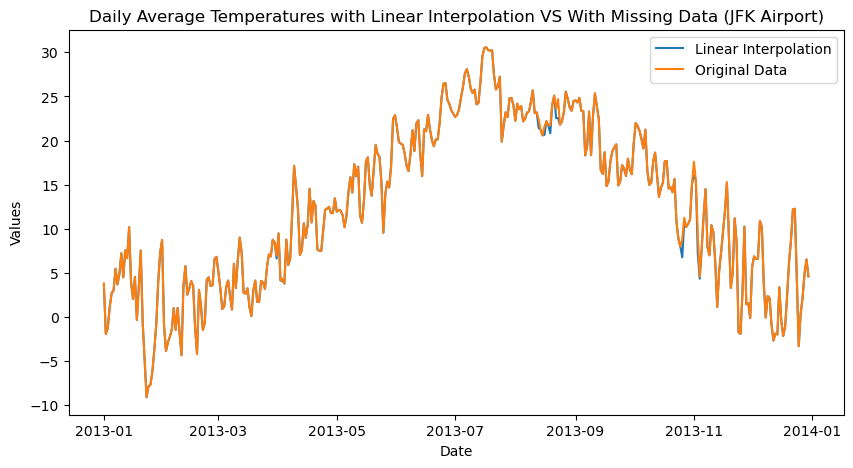

In [165]:
# Create a figure and axis
plt.figure(figsize=(10, 5))

# Plot average daily temperatures with linear interpolation
plt.plot(daily_avg_interpolated.index, daily_avg_interpolated, label='Linear Interpolation',)

# Plot daily average wind speed at LGA
plt.plot(JFK_d_means['date'], JFK_d_means['temp'], label='Original Data')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Daily Average Temperatures with Linear Interpolation VS With Missing Data (JFK Airport)')
plt.legend()

# Display the plot
plt.show()

From the above graph, we can see that the data missing is not serious and the Linear Interpolation method supplements the data in a better way and fits well with the original data.

### Conclusion

In conclusion, the analysis of 2013 weather data from New York airports (LGA, JFK, EWR) using Python and pandas has provided valuable insights. The daily wind speed analysis at LGA airport revealed notable fluctuations, particularly in February and December, with December exhibiting the highest wind speeds. Monthly wind speed comparisons across the three airports demonstrated similar patterns, peaking in March and November and reaching the lowest levels in August.

The examination of missing temperature data at JFK airport showcased the effectiveness of Linear Interpolation in filling the gaps. The interpolated data aligned well with the original dataset, indicating that this method was successful in supplementing missing temperature records. The overall analysis contributes to a comprehensive understanding of weather patterns and data manipulation techniques using pandas in Python.

### Reference
https://en.wikipedia.org/wiki/Body_mass_index